In [1]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fft
import sympy as sp
import numpy as np
import math
%run 'shared.ipynb' # holds notes + SP specific functions

In [2]:
ripple_db = 0.4
order = 3

zeros, poles, K = signal.cheb1ap(order, ripple_db)
display(zeros, poles, K)

array([], dtype=float64)

array([-0.3353828+1.04280625j, -0.6707656-0.j        ,
       -0.3353828-1.04280625j])

0.8048694089059498

In [3]:
a, z = sp.symbols("a z")
(1-a*z**(-1)).expand()

-a/z + 1

In [4]:
# b.1

z, a, w = sp.symbols("z a w")
exp = (1+a)/(1-a*z**(-1))
display(exp)
exp = exp.subs({z: sp.exp(1j*w), a: 0.7})
display(exp)
eqExp = sp.Eq(3, 20*sp.log(exp,10))

solExp = sp.solve(eqExp, w)

display(solExp[0].simplify())
display(exp.subs({w: solExp[0]}).simplify())

(a + 1)/(-a/z + 1)

1.7/(1 - 0.7*exp(-1.0*I*w))

-3.14159265358979 - 1.23537583727491*I

1.41253754462275 + 2.92511578294202e-17*I

In [5]:
# b.3

MVal = 4
fs = 30*10**3
fc = 2.5*10**3

wc = 2*sp.pi*(fc/fs)
w, j, M, n  = sp.symbols("\omega j M n")

# unused, does not work for some reason
# exp = 1/(2*sp.pi) * sp.integrate(sp.exp((-j*w*M)/2)*sp.exp(j*w*n), (w, -1*wc, wc))
# hd = exp.rewrite(sp.cos).simplify()
# hd = hd.args[1][0]
# display(hd)

firstExp = (sp.sin(sp.pi*(n-(M/2))))/(sp.pi*(n-(M/2)))
lastExp = (sp.sin(wc*(n-(M/2))))/(sp.pi*(n-(M/2)))
exp = firstExp - lastExp
hd = exp
display(hd)
display(hd.subs({j: 1j, M: MVal}))

hdValues = np.empty(MVal+1)
for nVal in range(0, MVal+1):
    hdFinal = sp.limit(hd.subs({j: 1j, M: MVal}), n, nVal)
    hdValues[nVal] = hdFinal
    display("h_d[{}] = {}".format(nVal, hdFinal.evalf()))

display(hdValues.sum())
display(20*sp.log(hdValues.sum(), 10).evalf())

sin(pi*(-M/2 + n))/(pi*(-M/2 + n)) - sin(pi*(-0.0833333333333333*M + 0.166666666666667*n))/(pi*(-M/2 + n))

-sin(pi*(0.166666666666667*n - 0.333333333333333))/(pi*(n - 2)) + sin(pi*(n - 2))/(pi*(n - 2))

'h_d[0] = -0.137832223855448'

'h_d[1] = -0.159154943091895'

'h_d[2] = 0.833333333333333'

'h_d[3] = -0.159154943091895'

'h_d[4] = -0.137832223855448'

0.2393589994386467

-12.4190047847337

(z**2 + 1.21)/(z*(z + 0.8))

[-0.800000000000000]

array([-0.+1.1j,  0.-1.1j])

array([-0.8])

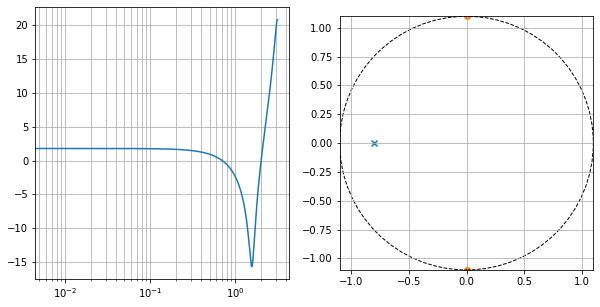

In [14]:
# b.5
z = sp.symbols("z")
exp = (1+1.21*z**(-2))/(1+0.8*z**(-1))
display(exp.simplify())

display(sp.solve(sp.Eq(0, 1+0.8*z**(-1)),z))

tf = signal.TransferFunction([1, 0, 1.21], [1, 0.8])
display(tf.zeros, tf.poles)
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
plotFilterDigital(ax[0], tf.num, tf.den, "")
simplezplane(ax[1], tf.num, tf.den, "")

In [7]:
# c.1
display("C.1")
h_n = [-3, 0, -3, 0]
N = 4
H_k = fft.fft(h_n)
z = sp.symbols("z")
H_z = np.array([hVal*z**(-1*i) for i, hVal in enumerate(H_k)]).sum()
dcHz = H_z.subs({z: sp.exp(1j*0)})
dcHzdB = (20*sp.log(abs(dcHz), 10)).evalf()
display(h_n, H_k, H_z, dcHz, dcHzdB)

# unused
#exp = lambda k: np.array([hVal*sp.exp(-1j*k*n*2*sp.pi/N) for n, hVal in enumerate(h_n)]).sum()
#H_k = [exp(k).evalf() for k in range(len(h_n))]
#display(H_k)

'C.1'

[-3, 0, -3, 0]

array([-6.-0.j,  0.+0.j, -6.-0.j,  0.-0.j])

-6.0 - 6.0/z**2

-12.0000000000000

21.5836249209525

In [8]:
# c.2
fc = 80 # 80 hz frequency

fs = sp.symbols("f_s")
wc = 2*sp.pi*(fc/fs) # define w_c using our unknown sampling frequency
exp = H_z.subs({z: sp.exp(1j*wc)})

# We do not want to solve it each time
#display(sp.solve(sp.Eq(0, exp), fs))
fs_real = 320

# test it
exp.subs({fs: fs_real}).evalf()


#expHk = expHk.subs({z: sp.exp(1j*w_c)})
#expHk = expHk.subs({w_c: 2*sp.pi*(f_c/f_s)})

#expEq = sp.solve(sp.Eq(expHk, 0), f_s)
#display(expEq)
# we find 320 from this
#real_f_s = 320

#display(expHk.subs({f_s: real_f_s}).evalf())

-0.e-135 + 6.08992754556916e-139*I

In [9]:
# c.3
display("C.3")
fs = fs_real
Td = 1/fs

n, t = sp.symbols("n t")
exp = sp.cos(40*sp.pi*t) # we basically have 20 Hz
expTime = exp.subs({t: n*Td})

sn = [expTime.subs({n: i}).evalf() for i in range(len(h_n))]
yn = np.convolve(sn, h_n)
display(sn, yn)

# calculate the gain (DC amplification)
w = 0
dcyn = np.array([yVal*sp.exp(-1j*w*i*Td) for i,yVal in enumerate(yn)]).sum()
dcyndb = (20*sp.log(abs(dcyn), 10)).evalf()
display(dcyn, dcyndb)

'C.3'

[1.00000000000000, 0.923879532511287, 0.707106781186548, 0.382683432365090]

array([-3.00000000000000, -2.77163859753386, -5.12132034355964,
       -3.91968889462913, -2.12132034355964, -1.14805029709527, 0],
      dtype=object)

-18.0820184763775

25.1449381734762

'C.4'

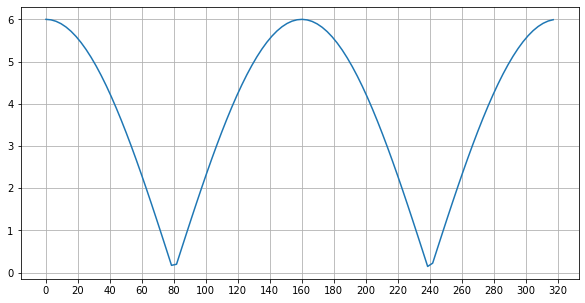

In [10]:
# c.4
display("C.4")
x = np.arange(0, fs, sp.pi)
y = np.empty(len(x))
for i, xVal in enumerate(x):
    w = 2*sp.pi*xVal
    out = np.array([hVal*sp.exp(-1j*w*i*Td) for i,hVal in enumerate(h_n)]).sum()
    y[i] = abs(out.evalf())

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x,y)
ax.set_xticks(ticks=np.arange(0,fs+20, 20))
ax.grid()
    
w = 2*sp.pi*80
out = np.array([hVal*sp.exp(-1j*w*i*Td) for i,hVal in enumerate(h_n)]).sum()

In [11]:
# c.5
fs = fs_real
Td = 1/fs
w = 2*sp.pi*80 # 80 Hz

n = sp.symbols("n")
exp = sp.cos(w*n*Td)
sn = [exp.subs({n: i}) for i in range(10)]
display(sn)
np.convolve(sn, h_n)

[1, 0, -1, 0, 1, 0, -1, 0, 1, 0]

array([-3, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, 0, 0], dtype=object)

In [12]:
H2k = np.array([-1, 1])
h2n = fft.ifft(H2k)
y2n = np.array([0, -4])
Y2k = fft.fft(y2n)
display(y2n, Y2k, h2n, H2k)

# we have y2[n] = conv(x2[n], h2[n])
# which is the same as Y2[k] = ifft(X2[k]*H2[k])
# which gives us X2[k] = ifft(Y2[k]/H2[k])
xn = fft.ifft(Y2k/H2k)
display(Y2k/H2k, xn)
np.convolve(xn, h2n)


array([ 0, -4])

array([-4.-0.j,  4.-0.j])

array([ 0.-0.j, -1.-0.j])

array([-1,  1])

array([4.+0.j, 4.-0.j])

array([4.+0.j, 0.+0.j])

array([ 0.+0.j, -4.+0.j,  0.+0.j])

In [13]:
# c.3
n = sp.symbols("n")
f_s = real_f_s
t = n*1/f_s

exp = sp.cos(40*sp.pi*t)
display(exp)
x_n = [exp.subs({n: nVal}) for nVal in range(0, 100)]
display(x_n)
display(H_k_real)
test = np.convolve(x_n, H_k_real)

for i, val in enumerate(test):
    display("x[{}] = {}".format(i, val.simplify().evalf(4)))

# f_s = 10*10**3
# f = 1*10**3
# 
# n = sp.symbols("n")
# # define our values
# t = n*(1/f_s) # actual time
# Omega = 2*sp.pi*f # given
# exp = sp.cos(Omega * t) # exp
# x_n = np.array([(sp.cos(n*((2*sp.pi)/10))).evalf(4) for n in range(0,4)])
# 
# con = np.convolve([0.5,-0.5,-0.5,0.5], x_n)


NameError: name 'real_f_s' is not defined